<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

# Dark Matter Search at ATLAS 

This notebook is a mixture from [ATLAS Open Data Jupyter Notebook](https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/tree/master/13-TeV-examples/uproot_python)


<a id='contents'></a>

Contents: 

[Dark Matter](#DM) <br />
[Dark Matter at ATLAS](#DM_ATLAS) <br />
[The ATLAS experiment](#ATLAS) <br />
[Running a Jupyter notebook](#running) <br />
[To setup everytime](#setup_everytime) <br />
[Processes](#processes) <br />
[Stack](#stack) <br />
[Cuts](#Cuts) <br />
[Significance](#significance) <br />

[Going further](#going_further) <br />

<a id='DM'></a>

## Dark Matter

Dark Matter is a hypothesised type of matter that does not interact with the electromagnetic force. It does not emit, absorb, or reflect light, making it invisible. So how has it been hypothesised? During various observations, astrophysicists have found that there isn't enough matter in space to account for all the gravitational attractions we measure! Therefore, there must be some invisible matter interacting with visible matter through Gravity.

Let's look at one example quickly: gravitational lensing. It is when light gets bent around objects in space due to the gravitational fields around massive bodies. This lets you see behind objects in space!

Diagram              |  Picture
:-------------------------:|:-------------------------:
![Gravitational Lensing Diagram](GravLensingCaltech.png)  |  ![Gravitational Lensing Photo](A_Horseshoe_Einstein_Ring_from_Hubble.png)

We see that mass has an effect on the path that light travels, so how does this relate to dark matter? Astrophysicists have seen light from distant objects that have been gravitationally lensed 'too much' - with the amount of observable mass causing the lensing, they should not see some objects that they in fact do! This then implies that there must be some more mass there that we can't see - dark matter!

Got interested and want to know more?
Check this [talk](https://youtu.be/YMYFhRz9UN8?t=1478) on “How the ATLAS experiment searches for Dark Matter” by Dr Christian Ohm (to be watched from the timestamp set in the link).

[Back to contents](#contents)

<a id='ATLAS'></a>

## The ATLAS experiment

The ATLAS experiment is a collaboration between thousands of scientists and engineers across the world to maintain the operation of the ATLAS detector and analyse the data it records to try and find new particles. Just like we are going to do!

![ATLAS map](ATLAS-Collaboration-Nationalities-Map.png)

The ATLAS detector is a general-purpose particle detector used to detect the particles that come out of the collisions of the Large Hadron Collider (LHC). It is a massive 46 metres long and 25 metres in diameter! You can explore a 3D model of the detector [here](http://opendata.atlas.cern/detector-app/) and learn more about its different parts and tools [here](https://atlas.cern/discover/detector). 


ATLAS vs Person              |  ATLAS vs Bus
:-------------------------:|:-------------------------:
![ATLAS vs Person](ATLASvsPerson.png)  |  ![ATLAS vs Bus](ATLASvsLondonDDbusSizeComparison.png)

Want to know more?
- [Link](https://www.youtube.com/playlist?list=PLFdk9xyc025FT0Zcmu4VM2uCLUAzXSZ) to an animation series that describes and explains the ATLAS detector (by CERN).
- [Link](https://www.youtube.com/watch?v=sVYUqMRolaA) to a more informal introduction to the ATLAS detector (by Sixty Symbols).

[Back to contents](#contents)

<a id='DM_ATLAS'></a>

## Dark Matter at ATLAS

So if dark matter is so common across the universe and its effects are clearly observed by astrophysicists, it should be easy to create and observe it using the ATLAS detector, right?

Unfortunately, not. Because we can't directly observe dark matter, there are many hypotheses of what it actually is. One hypothesis, or model, that we will be searching for is called a Weakly Interacting Massive Particle (WIMP).

As you can guess from the name, this type of dark matter particle is hard to detect because it doesn't really interact with other things. For example WIMPs don't interact with electromagnetic radiation, including light. Hence, we can't see them!

So what can we do to detect dark matter? Well if we can't see the dark matter around us, let's make the dark matter ourselves and see what happens!

At the LHC we collide particles together and look at new particles that are created from these collisions. What we can do is collide protons and look to see if any of those collisions produce dark matter particles! In the next section, we'll specifically look at the hypothesised process that creates dark matter.

We will focus our search in **invisibly decaying Higgs boson** or dark matter candidates produced in association with a **leptonically decaying Z boson** in proton–proton collisions.

The search is carried out in a final state with two isolated electrons or muons from a Z boson decay and large missing transverse momentum (ETmiss) due to an invisible Higgs boson decay or a WIMP pair (ll + ETmiss).


![ZMET](ZMETHiggs.gif)


There are several Z boson decay channels, but our focus will be the **visible leptonic decay channel**


![ZDecay](ZDecay.png)




Also the selection criteria and background processes chosen for this events were collected from [here](https://doi.org/10.1016/j.physletb.2017.11.049)




![cuts](selection.png)

- [Link](https://doi.org/10.1016/j.physletb.2017.11.049) Search for an invisibly decaying Higgs boson or dark matter candidates produced in association with a Z boson in pp collisions at s=sqrt 13 TeV with the ATLAS detector.



# Let's get started!


[Back to contents](#contents)

<a id='running'></a>

## Running a Jupyter notebook

You can run a single code cell by clicking on it then pressing Shift+Enter on your keyboard.



<a id='setup_everytime'></a>

## To setup everytime

to be run every time you re-open this notebook

We're going to be using a number of tools to help us:
* pandas: lets us store data as dataframes, a format widely used in Machine Learning
* numpy: provides numerical calculations such as histogramming
* matplotlib: common tool for making plots, figures, images, visualisations

In [1]:
import pandas # to store data as dataframe
import numpy # for numerical calculations such as histogramming
import matplotlib.pyplot # for plotting

<a id='processes'></a>

## Processes

The Dark Matter process we'll be looking for is <font color='red'>'DM_300'</font>, which we call "<font color='purple'>signal</font>". The others are processes that may look like our <font color='purple'>signal</font>, so we have to consider them as well, which we call "<font color='red'>backgrounds</font>".

In [3]:
processes = ['Non-resonant_ll','Z+jets','WZ','ZZ','DM_300']

This is where the data files are read

In [4]:
data_all = {} # dictionary to hold all data
for s in processes: # loop over different processes
    print(s)
    data_all[s] = pandas.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/'+s+'.csv') # read data files

Non-resonant_ll
Z+jets
WZ
ZZ
DM_300


[Back to contents](#contents)

Let's take a look at the data for the <span style="color:red">'ZZ'</span> process.

In [5]:
data_all['ZZ']

,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
0,-0.027416,0,71.047820,32.137652,62.644781,95.006336,1.311033,2.710064,0.010718,0.663473,0
1,0.003059,0,135.839234,125.675648,96.340836,261.387844,0.751035,2.523028,0.005747,0.570956,0
2,0.039517,0,114.778328,26.994449,97.414489,100.849180,1.927345,3.141085,0.089636,0.610257,0
3,0.029250,0,63.946281,60.070992,88.347870,85.599453,1.537237,3.106254,0.080803,0.690222,0
4,0.003513,0,116.763242,42.810539,91.717687,166.612156,1.404091,3.048883,0.013493,0.691578,0
...,...,...,...,...,...,...,...,...,...,...,...
9533,0.004445,0,56.719008,27.982125,75.647385,85.264977,1.758040,2.977628,0.026521,0.530827,1
9534,0.002551,0,64.996309,35.529047,89.351463,130.122180,1.989760,2.319482,0.080313,0.655267,0
9535,0.004256,0,101.452180,43.186754,93.196331,329.000406,1.561961,2.782490,0.054490,0.763554,0
9536,0.003677,0,57.407633,39.978078,93.326705,199.754750,1.799303,2.220820,0.033889,0.582254,0


<a id='task1'></a>
👇👇
### Task 1: Can you print the <font color='red'>'DM_300'</font> table?




<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 1</summary>
 
All you need to do compared to `data_all['ZZ']` above is change <span style="color:red">ZZ</span> to <span style="color:red">DM_300</span>
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 1</summary>
 
```python
data_all['DM_300']
```
    
</details>
</html>

In [5]:
# your code for Task 1 here


📌 Also you can print the keys of your table

In [6]:
data_all["DM_300"].keys()

Index(['totalWeight', 'sum_lep_charge', 'lead_lep_pt', 'sublead_lep_pt', 'mll',
       'ETmiss', 'dRll', 'dphi_pTll_ETmiss', 'fractional_pT_difference',
       'ETmiss_over_HT', 'N_bjets'],
      dtype='object')

The dataset for each process is like a table of values. Each row is a different particle collision (what we call *event*). Each column is a different variable measured in that particle collision.

📌 the variables in this dataset are previously reconstructed for this particular analysis, usually the dataset from **CERN** are **ROOT** files, those are compressed binary files in which we can save objects of any type.


Let's make some graphs of the different variables in our datasets.

First, the leading lepton $p_T$ (<font color='red'>'lead_lep_pt'</font>)

Let's first look at the <font color='red'>'lead_lep_pt'</font> column of the <font color='red'>'DM_300'</font> data table.

In [7]:
data_all['DM_300']['lead_lep_pt']

0      113.229602
1       89.615922
2      112.169008
3      108.710273
4       85.937289
          ...    
486     78.753086
487     94.828984
488    121.088344
489    166.182469
490     63.209102
Name: lead_lep_pt, Length: 491, dtype: float64

Now let's plot this in a histogram.

(array([196., 177.,  52.,  28.,  21.,  10.,   3.,   3.,   0.,   1.]),
 array([ 47.08450391, 100.28201602, 153.47952813, 206.67704023,
        259.87455234, 313.07206445, 366.26957656, 419.46708867,
        472.66460078, 525.86211289, 579.059625  ]),
 <BarContainer object of 10 artists>)

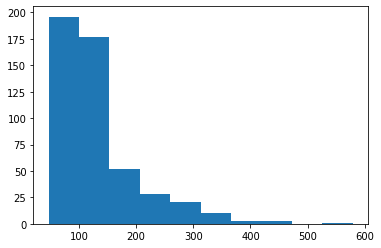

In [8]:
matplotlib.pyplot.hist(data_all['DM_300']['lead_lep_pt'])

It's always a good idea to add an x-axis label to your graph.

Text(0.5, 0, 'lead_lep_pt')

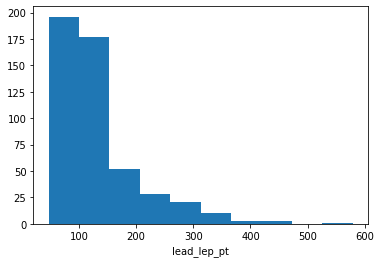

In [9]:
matplotlib.pyplot.hist(data_all['DM_300']['lead_lep_pt'])
matplotlib.pyplot.xlabel('lead_lep_pt') # x-axis label

...and x-axis units!

Text(0.5, 0, 'lead_lep_pt [GeV]')

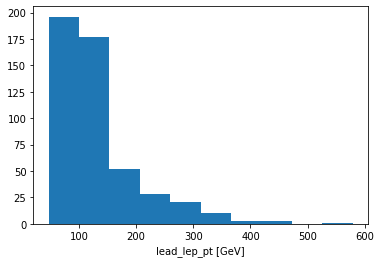

In [10]:
matplotlib.pyplot.hist(data_all['DM_300']['lead_lep_pt'])
matplotlib.pyplot.xlabel('lead_lep_pt [GeV]') # x-axis label

...and a y-axis label.

Text(0, 0.5, 'Events')

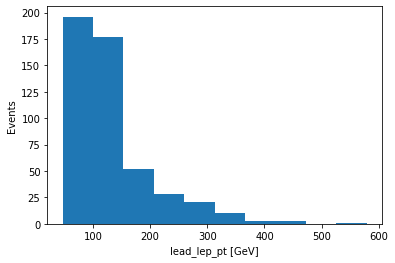

In [11]:
matplotlib.pyplot.hist(data_all['DM_300']['lead_lep_pt'])
matplotlib.pyplot.xlabel('lead_lep_pt [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Events') # y-axis label

It's also a good idea to add a label and a legend to a graph.

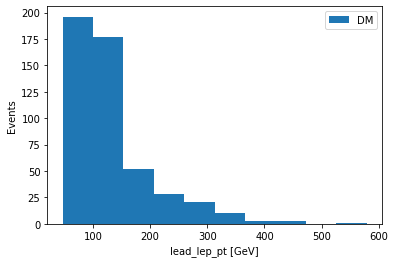

In [12]:
matplotlib.pyplot.hist(data_all['DM_300']['lead_lep_pt'], label='DM')
matplotlib.pyplot.xlabel('lead_lep_pt [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot

<a id='task2'></a>

### Task 2: Estimate by eye from the graph above *how many events have <font color='red'>lead_lep_pt</font> below* 100 GeV.

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 2</summary>
 
On the x-axis there's 1 bar below 100. Read across from the top of that bar to the y-axis to get the number of events.
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 2</summary>
 
About 190
    
</details>
</html>

<a id='task3'></a>

### Task 3: Estimate by eye from the graph above *how many events have <font color='red'>lead_lep_pt</font> between* 100 and 150 GeV.

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 3</summary>
 
On the x-axis there's 1 bar between 100 and 150. Read across from the top of that bar to the y-axis to get the number of data points.
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 3</summary>
 
About 175
    
</details>
</html>

<a id='task4'></a>

### Task 4: Estimate by eye from the graph above *how many data points have <font color='red'>lead_lep_pt</font> above* 500 GeV.

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 4</summary>
 
On the x-axis there's 1 bar above 500. Read across from the top of that bar to the y-axis to get the number of events.
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 4</summary>
 
1? Maybe 2? Not many that's for sure!
    
</details>
</html>

<a id='task5'></a>

### Task 5: Estimate by eye from the graph above *how many data points have <font color='red'>lead_lep_pt</font> below* 150 GeV.

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 5</summary>
 
On the x-axis there are 2 bars below 150. Read across from the top of those bars to the y-axis to get the number of events for each. Add those two numbers together.
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 5</summary>
 
About 190+175=365
    
</details>
</html>

We need to scale the graph using the <font color='red'>'totalWeight'</font> column to get the number of collisions that would actually be measured, as opposed to the number of collisions that were generated by our computer simulations.


📌  The number of events generated in the Monte Carlo simulation is arbitrary and is unrelated to the number of events we expect in real data. Usually, we try to generate as many events as possible given the available computer resources (MC simulation is computationally very hard) so we usually have more MC events than real data events. So in order to create MC plots that would show our expectation of what to see in real data, we need to apply some weights.

In particle physics, the following formula is used to get the expected number of events in data:

Nexp = σ * L * ε,

where **σ** is the cross-section of the process of interest, **L** is the integrated luminosity (often called just the luminosity) and **ε** is the efficiency.


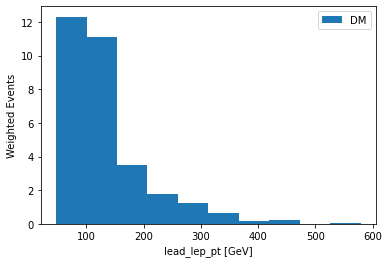

In [13]:
matplotlib.pyplot.hist(data_all['DM_300']['lead_lep_pt'], weights=data_all['DM_300']['totalWeight'], label='DM')
matplotlib.pyplot.xlabel('lead_lep_pt [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot

<a id='task6'></a>

### Task 6: Comparing the above graph without weighting and the graph with weighting, estimate by eye the *average value of <font color='red'>totalWeight</font> in the <font color='red'>DM_300</font> data.

You can also use python as a calculator like:

In [14]:
342/4356

0.07851239669421488

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 6</summary>
 
You could divide the number of weighted events in the first bar by the number of events in the first bar to get an estimate.
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 6</summary>
 
About 12.2/190 = 0.064
    
</details>
</html>

<a id='task7'></a>

### Task 7: Plot other variables of interest like Missing Et and the Lepton Invariant Mass, using <font color='red'>totalWeight</font> in the <font color='red'>DM_300</font> data.

In [15]:
#Your code here

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 7</summary>

```python
    
##ploting ETmiss    
matplotlib.pyplot.hist(data_all['DM_300']['ETmiss'], weights=data_all['DM_300']['totalWeight'], label='DM')
matplotlib.pyplot.xlabel('ETmiss [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot

##plotting mll
matplotlib.pyplot.hist(data_all['DM_300']['mll'], weights=data_all['DM_300']['totalWeight'], label='DM')
matplotlib.pyplot.xlabel('mll [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot    
    
```
</details>
</html>

📌 <a id='stack'></a>

## Stack

### What is the mean value for the Invariant Mass plot ? 



Now we need to stack the processes on top of each other in the graph. To do this, we <font color='green'>for</font> loop over the different processes.

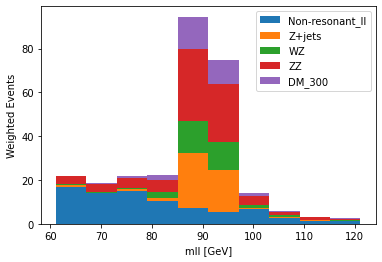

In [14]:
stacked_variable = [] # list to hold variable to stack
stacked_weight = [] # list to hold weights to stack

for s in processes: # loop over different processes
    stacked_variable.append(data_all[s]['mll']) # get each value of variables
    stacked_weight.append(data_all[s]['totalWeight']) # get each value of weight
    
#Ploting the histogram    
matplotlib.pyplot.hist(stacked_variable, weights=stacked_weight, label=processes, stacked=True)
matplotlib.pyplot.xlabel('mll [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot

In order to identify the events for DM particle production, we need to apply the object-selection criteria or

👇👇

 <a id='cuts'></a>


## Cuts

In [17]:
dtdmcuts = data_all['DM_300']['mll']>120.00 # play with the selection criteria to see how the match

dtdmcuts



0      False
1      False
2      False
3      False
4      False
       ...  
486    False
487    False
488    False
489    False
490    False
Name: mll, Length: 491, dtype: bool

After playing a bit with cuts to see how they respond to several criteria, we need to apply the cuts for our analysis:
- Two leptons only from Z boson.
- High ETmiss.

In [16]:

dtcuts = {} # dictionary to hold cut data

#loop inthe processes
for s in processes:
    #print(s)
    dtcuts[s] = data_all[s][(data_all[s]['mll']>81.00) & # Z-boson mass - 10 GeV
                        (data_all[s]['mll']<101.12) & # Z-boson mass + 10 GeV
                        (data_all[s]['ETmiss']>=200.00) #ETmiss > 200 GeV
                        ] 
             

dtcuts['DM_300'] # print as table





,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
3,0.067919,0,108.710273,93.620266,89.113704,221.266453,0.872517,3.052979,0.005579,0.940918,0
5,0.000174,0,79.053664,38.200391,89.623643,226.343984,1.735517,2.947612,0.013806,0.889046,0
8,0.034657,0,188.996453,177.431531,90.325784,342.348906,0.497169,3.039990,0.021653,0.866413,0
10,0.067610,0,186.704344,71.938375,88.491016,237.376266,0.776001,3.025616,0.035032,0.917777,0
11,0.110482,0,165.282953,118.880961,100.083266,269.230406,0.725428,3.107656,0.002221,0.947448,0
...,...,...,...,...,...,...,...,...,...,...,...
477,0.032190,0,258.192313,113.454172,96.298442,353.077906,0.565842,3.071507,0.026560,0.950037,0
479,0.075208,0,115.740711,51.361859,86.434064,468.438875,1.090533,3.016603,0.149223,0.586167,0
484,0.041037,0,151.678000,49.389938,97.564606,225.746484,1.074874,2.510083,0.156966,0.791906,0
485,0.048131,0,144.249594,131.857344,91.029382,232.873734,0.672385,3.059999,0.092221,0.776233,0


## Plot several variables and see how the histograms change

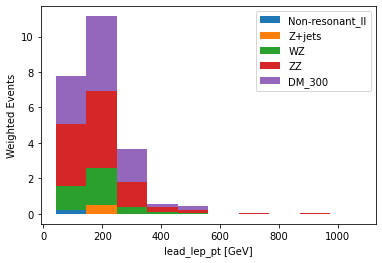

In [17]:
stacked_variable_cut = [] # list to hold variable to stack
stacked_weight_cut = [] # list to hold weights to stack

for s in processes: # loop over different processes
    stacked_variable_cut.append(dtcuts[s]['lead_lep_pt']) # get each value of variables
    stacked_weight_cut.append(dtcuts[s]['totalWeight']) # get each value of weight
    
#Ploting the histogram    
matplotlib.pyplot.hist(stacked_variable_cut, weights=stacked_weight_cut, label=processes, stacked=True)
matplotlib.pyplot.xlabel('lead_lep_pt [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot

In [20]:
#your code here

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint</summary>
 
    
```python
stacked_variable_cut = [] # list to hold variable to stack
stacked_weight_cut = [] # list to hold weights to stack

for s in processes: # loop over different processes
    stacked_variable_cut.append(dtcuts[s]['ETmiss']) # get each value of variables
    stacked_weight_cut.append(dtcuts[s]['totalWeight']) # get each value of weight
    
#Ploting the histogram    
matplotlib.pyplot.hist(stacked_variable_cut, weights=stacked_weight_cut, label=processes, stacked=True)
matplotlib.pyplot.xlabel('ETmiss [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot
```
    
    
    
</details>
</html>



[Back to contents](#contents)


 <a id='significance'></a>
 
## Significance

In particle physics, we declare that we have evidence for a process such as Dark Matter if we find a "significance" over 3.

significance = $\frac{\text{total signal weights}}{\sqrt{\text{total background weights}}}$

So let's see what significances we get for different variables. Can we get above 3?

Text(0, 0.5, 'Significance')

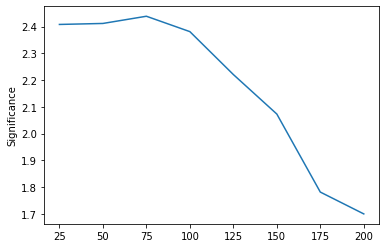

In [19]:
x_values = [25,50,75,100,125,150,175,200] # the x-values at which significance will be calculated
# Taking a look at the leading lepton graph, the maximum x-value at which there's a mix of 
# different colours present is a bit over 200.
# So we wrote the x-values up to 200 in gaps of 25.
# If you want, you can try different x-values later and see how it looks.

sigs = [] # list to hold significance values
for x in x_values: # loop over bins
    signal_weights_selected = 0 # start counter for signal weights
    background_weights_selected = 0 # start counter for background weights
    for s in processes: # loop over background samples
        if 'DM' in s: signal_weights_selected += sum(dtcuts[s][dtcuts[s]['lead_lep_pt']>x]['totalWeight']) 
            #numpy.sum(arr, axis, dtype, out) : This function returns the sum of array elements over the specified axis
        
        else: background_weights_selected += sum(dtcuts[s][dtcuts[s]['lead_lep_pt']>x]['totalWeight'])
    
    sig_value = signal_weights_selected/numpy.sqrt(background_weights_selected)
    
    sigs.append(sig_value) # append to list of significance values

matplotlib.pyplot.plot( x_values[:len(sigs)], sigs ) # plot the data points
matplotlib.pyplot.ylabel('Significance') # y-axis label

<a id='task10'></a>

Estimate by eye from the graph above the *maximum significance that can be achieved using <font color='red'>lead_lep_pt</font>*.



<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 8</summary>
 
Read across to the y-axis from the highest point on the graph.
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 8</summary>
 
About 2.53
    
</details>
</html>

Not the significance over 3 we were hoping for :(

### What about any other variables?

<a id='task11'></a>

### Fill in the code to make a graph of <span style="color:red">'sublead_lep_pt'</span>

In [22]:
stacked_variable = [] # list to hold variable to stack
stacked_weight = [] # list to hold weights to stack
for s in processes: # loop over different processes
    stacked_variable.append(dtcuts[s]['--']) # get each value of variables
    stacked_weight.append(dtcuts[s]['--']) # get each value of weight
matplotlib.pyplot.hist(stacked_variable, weights=stacked_weight, label=processes, stacked=True)
matplotlib.pyplot.xlabel('sublead_lep_pt [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot

KeyError: '--'

<a id='task8'></a>

### Task 8: Apply cuts from the initial selection criteria table.

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 9</summary>
 
All you need to do compared to the colourful graph above is change the red text from <span style="color:red">'lead_lep_pt'</span> to <span style="color:red">'sublead_lep_pt'</span>
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 9</summary>
 
```python
stacked_variable = [] # list to hold variable to stack
stacked_weight = [] # list to hold weights to stack
for s in processes: # loop over different processes
    stacked_variable.append(data_all[s]['sublead_lep_pt']) # get each value of variable
    stacked_weight.append(data_all[s]['totalWeight']) # get each value of weight
matplotlib.pyplot.hist(stacked_variable, weights=stacked_weight, label=processes, stacked=True)
matplotlib.pyplot.xlabel('sublead_lep_pt [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot
```
    
</details>
</html>

[Back to contents](#contents)

<a id='task12'></a>

### Choose the x-values for your significance graph of <font color='red'>'sublead_lep_pt'</font>, then plot the significance graph

There isn't really "correct" answer for the x-values, just something that shows the significance across a range of values.

Only click on the hints if you need.



In [ ]:
x_values = [15,30,45,60,75,90,105,120,135,150] # the x-values at which significance will be calculated

sigs = [] # list to hold significance values
for x in x_values: # loop over bins
    signal_weights_selected = 0 # start counter for signal weights
    background_weights_selected = 0 # start counter for background weights
    for s in processes: # loop over background samples
        if 'DM' in s: signal_weights_selected += sum(dtcuts[s][dtcuts[s]['lead_lep_pt']>x]['totalWeight'])
        else: background_weights_selected += sum(dtcuts[s][dtcuts[s]['lead_lep_pt']>x]['totalWeight'])
    sig_value = signal_weights_selected/numpy.sqrt(background_weights_selected)
    sigs.append(sig_value) # append to list of significance values

matplotlib.pyplot.plot( x_values[:len(sigs)], sigs ) # plot the data points
matplotlib.pyplot.ylabel('Significance') # y-axis label

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 10.1</summary>
 
What's the maximum x-value at which there's a mix of different colours present in the <span style="color:red">'sublead_lep_pt'</span> graph?
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 10.2</summary>
 
Compared to the code for the significance graph above, you only need to change the red text from <span style="color:red">'lead_lep_pt'</span> to <span style="color:red">'sublead_lep_pt'</span>
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Solution 10</summary>
 
```python
x_values = [15,30,45,60,75,90,105,120,135,150] # the x-values for significance

sigs = [] # list to hold significance values
for x in x_values: # loop over bins
    signal_weights_selected = 0 # start counter for signal weights
    background_weights_selected = 0 # start counter for background weights
    for s in processes: # loop over background samples
        if 'DM' in s: signal_weights_selected += sum(data_all[s][data_all[s]['lead_lep_pt']>x]['totalWeight'])
        else: background_weights_selected += sum(data_all[s][data_all[s]['lead_lep_pt']>x]['totalWeight'])
    sig_value = signal_weights_selected/numpy.sqrt(background_weights_selected)
    sigs.append(sig_value) # append to list of significance values

matplotlib.pyplot.plot( x_values[:len(sigs)], sigs ) # plot the data points
matplotlib.pyplot.ylabel('Significance') # y-axis label
```
    
</details>
</html>

Can we get a significance above 3 for <font color='red'>'sublead_lep_pt'</font>?

What about any other variables?

<a id='task13'></a>

### Plot the significance for <font color='red'>'ETmiss'</font>, <font color='red'>'ETmiss_over_HT'</font>,<font color='red'>'dphi_pTll_ETmiss'</font>.

<font color='red'>'ETmiss'</font> has units [GeV], <font color='red'>'ETmiss_over_HT'</font> has no units and <font color='red'>'dphi_pTll_ETmiss'</font> has units [rad]

In [ ]:
x_values = [2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0] # the x-values for significance

sigs = [] # list to hold significance values
for x in x_values: # loop over bins
    signal_weights_selected = 0 # start counter for signal weights
    background_weights_selected = 0 # start counter for background weights
    for s in processes: # loop over background samples
        if 'DM' in s: signal_weights_selected += sum(data_all[s][data_all[s]['dphi_pTll_ETmiss']>x]['totalWeight'])
        else: background_weights_selected += sum(data_all[s][data_all[s]['dphi_pTll_ETmiss']>x]['totalWeight'])
    sig_value = signal_weights_selected/numpy.sqrt(background_weights_selected)
    sigs.append(sig_value) # append to list of signifcance values

matplotlib.pyplot.plot( x_values[:len(sigs)], sigs ) # plot the data points
matplotlib.pyplot.ylabel('Significance') # y-axis label

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for Hint 11</summary>
 
Repeat the process for [Task 9](#task9) and [Task 10](#task10) by copy and pasting the code blocks, then changing the bits you need to change.
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for part 1 to Solution 11</summary>
 
```python
stacked_variable = [] # list to hold variable to stack
stacked_weight = [] # list to hold weights to stack
for s in processes: # loop over different processes
    stacked_variable.append(data_all[s]['ETmiss']) # get each value of variable
    stacked_weight.append(data_all[s]['totalWeight']) # get each value of weight
matplotlib.pyplot.hist(stacked_variable, weights=stacked_weight, label=processes, stacked=True)
matplotlib.pyplot.xlabel('ETmiss [GeV]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot
```
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for part 2 to Solution 11</summary>
 
```python
x_values = [100,150,200,250,300,350,400,450,500] # the x-values for significance

sigs = [] # list to hold significance values
for x in x_values: # loop over bins
    signal_weights_selected = 0 # start counter for signal weights
    background_weights_selected = 0 # start counter for background weights
    for s in processes: # loop over background samples
        if 'DM' in s: signal_weights_selected += sum(data_all[s][data_all[s]['ETmiss']>x]['totalWeight'])
        else: background_weights_selected += sum(data_all[s][data_all[s]['ETmiss']>x]['totalWeight'])
    sig_value = signal_weights_selected/numpy.sqrt(background_weights_selected)
    sigs.append(sig_value) # append to list of significance values

matplotlib.pyplot.plot( x_values[:len(sigs)], sigs ) # plot the data points
matplotlib.pyplot.ylabel('Significance') # y-axis label
```
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for part 3 to Solution 11</summary>
 
```python
stacked_variable = [] # list to hold variable to stack
stacked_weight = [] # list to hold weights to stack
for s in processes: # loop over different processes
    stacked_variable.append(data_all[s]['ETmiss_over_HT']) # get each value of variable
    stacked_weight.append(data_all[s]['totalWeight']) # get each value of weight
matplotlib.pyplot.hist(stacked_variable, weights=stacked_weight, label=processes, stacked=True)
matplotlib.pyplot.xlabel('ETmiss_over_HT') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot
```
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for part 4 to Solution 11</summary>
 
```python
x_values = [0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2] # the x-values at for significance

sigs = [] # list to hold significance values
for x in x_values: # loop over bins
    signal_weights_selected = 0 # start counter for signal weights
    background_weights_selected = 0 # start counter for background weights
    for s in processes: # loop over background samples
        if 'DM' in s: signal_weights_selected += sum(data_all[s][data_all[s]['ETmiss_over_HT']>x]['totalWeight'])
        else: background_weights_selected += sum(data_all[s][data_all[s]['ETmiss_over_HT']>x]['totalWeight'])
    sig_value = signal_weights_selected/numpy.sqrt(background_weights_selected)
    sigs.append(sig_value) # append to list of significance values

matplotlib.pyplot.plot( x_values[:len(sigs)], sigs ) # plot the data points
matplotlib.pyplot.ylabel('Significance') # y-axis label
```
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for part 5 to Solution 11</summary>
 
```python
stacked_variable = [] # list to hold variable to stack
stacked_weight = [] # list to hold weights to stack
for s in processes: # loop over different processes
    stacked_variable.append(data_all[s]['dphi_pTll_ETmiss']) # get each value of variables
    stacked_weight.append(data_all[s]['totalWeight']) # get each value of weight
matplotlib.pyplot.hist(stacked_variable, weights=stacked_weight, label=processes, stacked=True)
matplotlib.pyplot.xlabel('dphi_pTll_ETmiss [rad]') # x-axis label
matplotlib.pyplot.ylabel('Weighted Events') # y-axis label
matplotlib.pyplot.legend() # add legend to plot
```
    
</details>
</html>

<html>
<details>
<summary style="color:orange; font-weight: bold;">Click me for part 6 to Solution 11</summary>
 
```python
x_values = [2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0] # the x-values for significance

sigs = [] # list to hold significance values
for x in x_values: # loop over bins
    signal_weights_selected = 0 # start counter for signal weights
    background_weights_selected = 0 # start counter for background weights
    for s in processes: # loop over background samples
        if 'DM' in s: signal_weights_selected += sum(data_all[s][data_all[s]['dphi_pTll_ETmiss']>x]['totalWeight'])
        else: background_weights_selected += sum(data_all[s][data_all[s]['dphi_pTll_ETmiss']>x]['totalWeight'])
    sig_value = signal_weights_selected/numpy.sqrt(background_weights_selected)
    sigs.append(sig_value) # append to list of signifcance values

matplotlib.pyplot.plot( x_values[:len(sigs)], sigs ) # plot the data points
matplotlib.pyplot.ylabel('Significance') # y-axis label
```
    
</details>
</html>

<a id='going_further'></a>

## Going further

If you want to go further, there are a number of things you could try. Try each of these one by one: 
* A different Dark Matter <font color='purple'>signal</font> in "[Processes](#processes)". Change <span style="color:red">'DM_300'</span> to one of <span style="color:red">'DM_10'</span>, <span style="color:red">'DM_100'</span>, <span style="color:red">'DM_200'</span>, <span style="color:red">'DM_400'</span>, <span style="color:red">'DM_500'</span>, <span style="color:red">'DM_600'</span>, <span style="color:red">'DM_700'</span>, <span style="color:red">'DM_800'</span>, <span style="color:red">'DM_2000'</span>.
* Make colourful graphs of the other variables present in your datasets.